# Filtering

## Preparation

In [17]:
import mne
import os
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mne.channels import make_standard_montage
from mne import pick_types
from mne.decoding import CSP
from GA_data_preprocessing import *


### Initializing data and event files

In [2]:
dir_address = "../../grasp-and-lift-eeg-detection"

# Training data
training_files = os.listdir(f"{dir_address}/train") # subj1_series1_data.csv
# Subsetting training files
training_files_events = [file for file in training_files if re.search("events",file)]
training_files_data = [file for file in training_files if re.search("data",file)]

# Testing data 
testing_files = os.listdir(f"{dir_address}/test")
# Subsetting testing files
testing_files_events = [file for file in testing_files if re.search("events",file)]
testing_files_data = [file for file in testing_files if re.search("data",file)]

### Unfiltered Data

Creating RawArray with float64 data, n_channels=32, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.


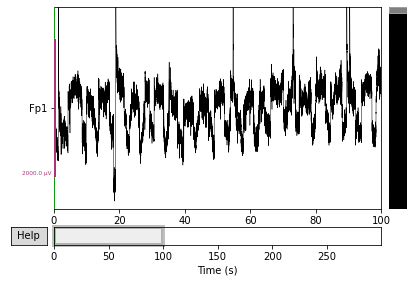

Effective window size : 4.096 (s)


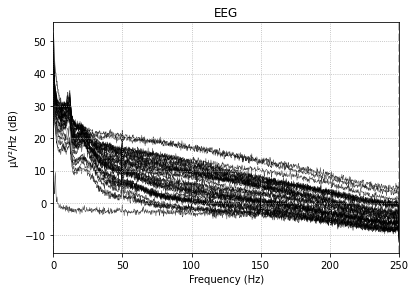

In [12]:
raw_unfiltered = get_data(2,8,dir_address)
raw_unfiltered.plot(events=None,n_channels=1,duration=100,scalings=scalings,verbose=False);
raw_unfiltered = raw_unfiltered.pick_types(meg=False, eeg=True, eog=False)
raw_unfiltered.plot_psd(spatial_colors=False)
plt.show()


### Filtering method #1 - IIR

Creating RawArray with float64 data, n_channels=32, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

II

<Figure size 720x432 with 0 Axes>

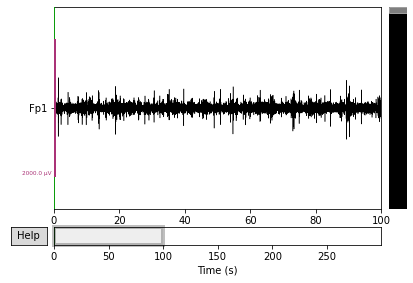

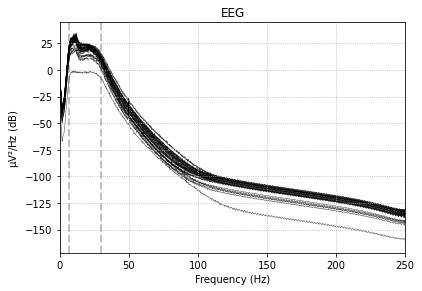

In [16]:

raw_1 = get_data(2,8,dir_address)
raw_1 = raw_1.filter(l_freq=7,h_freq=30,method="iir")
raw_1.plot(events=None,n_channels=1,duration=100,scalings=scalings,verbose=False,show=False)
raw_1 = raw_1.pick_types(meg=False, eeg=True, eog=False)
raw_1.plot_psd(spatial_colors=False,show=False)


### Filtering method #2 - FIR

Creating RawArray with float64 data, n_channels=32, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=149945
    Range : 0 ... 149944 =      0.000 ...   299.888 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FI

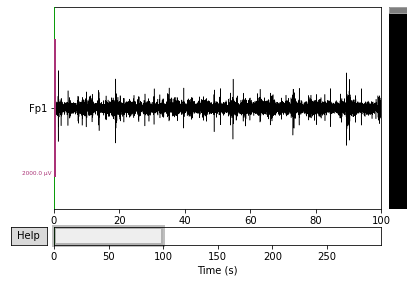

Effective window size : 4.096 (s)


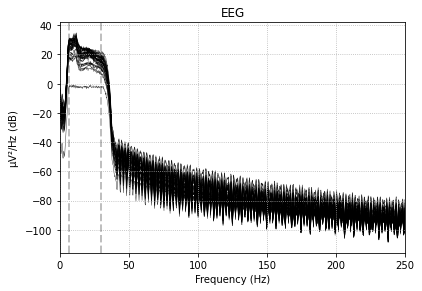

In [14]:
raw_2 = get_data(2,8,dir_address)
raw_2 = raw_2.filter(l_freq = 7, h_freq = 30, method="fir")
raw_2.plot(events=None,n_channels=1,duration=100,scalings=scalings,verbose=False,show=True)
raw_2 = raw_2.pick_types(meg=False, eeg=True, eog=False)
raw_2.plot_psd(spatial_colors=False,show=False)
plt.show()